# Creating Our First Julia App

We will learn to perform exploratory data analysis with Julia. In the process, we'll take a
look at RDatasets, a package that provides access to over 700 learning datasets. We'll load
one of them, the Iris flowers dataset, and we'll manipulate it using standard data analysis
functions. Then we'll look more closely at the data by employing common visualization
techniques. And finally, we'll see how to persist and (re)load our data.

But, in order to do that, first we need to revisit and take a look at some of the language's
most important building blocks.

We will cover the following topics in this chapter:

- Declaring variables (and constants)
- Working with Strings of characters and regular expressions
- Numbers and numeric types
- Our first Julia data structures—Tuple, Range, and Array
- Exploratory data analysis using the Iris flower dataset—RDatasets and core
- Statistics
- Quick data visualization with Gadfly
- Saving and loading tabular data with CSV and Feather
- Interacting with MongoDB databases

# Technical requirements

In order to install a specific version of a package you need to run:

In [2]:
# pkg> add PackageName@vX.Y.Z

# Defining variables

We have seen in the previous chapter how to use the REPL in order to execute
computations and have the result displayed back to us. Julia even lends a helping hand by
setting up the ans variable, which automatically holds the last computed value.

But, if we want to write anything but the most trivial programs, we need to learn how to
define variables ourselves. In Julia, a variable is simply a name associated to a value. There
are very few restrictions for naming variables, and the names themselves have no semantic
meaning (the language will not treat variables differently based on their names, unlike say
Ruby, where a name that is all caps is treated as a constant).

The variables, names are case-sensitive, meaning that ANSWER and answer (and Answer
and aNsWeR) are completely different things

Emojis also work, if your terminal supports them:

The only explicitly disallowed names for variables are the names of built-in Julia statements
(do, end, try, catch, if, and else, plus a few more):

In [4]:
do = 3

LoadError: syntax: invalid "do" syntax

Attempting to access a variable that hasn't been defined will result in an error:

It's true that the language does not impose many restrictions, but a set of code style
conventions is always useful—and even more so for an open source language. The Julia
community has distilled a set of best practices for writing code. In regard to naming
variables, the names should be lowercase and in just one word; word separation can be
done with underscores (_), but only if the name would be difficult to read without them.
For example, myvar versus total_length_horizontal.

# Constants

Constants are variables that, once declared, can't be changed. They are declared by
prefixing them with the const keyword:

In [6]:
const a = 3.2

3.2

Very importantly in Julia, constants are not concerned with their value, but rather with
their type. It is a bit too early to discuss types in Julia, so for now it suffices to say that a type
represents what kind of a value we're dealing with. For instance, "abc" (within double
quotes) is of type String, 'a' (within single quotes) is of type Char , and 1000 is of type
Int (because it's an integer). Thus, in Julia, unlike most other languages, we can change the
value assigned to a constant as long as the type remains the same. For instance, we can at
first decide that eggs and milk are acceptable meal choices and go vegetarian:

In [7]:
a = 3.9

3.9

In [8]:
a = 1

LoadError: invalid redefinition of constant a

# Why are constants important?

It's mostly about performance. Constants can be especially useful as global values. Because
global variables are long-lived and can be modified at any time and from any location in
your code, the compiler is having a hard time optimizing them. If we tell the compiler that
the value is constant and thus that the type of the value won't change, the performance
problem can be optimized away.

Global values in Julia, like in other languages,
must be avoided whenever possible. Besides performance issues, they can
create subtle bugs that are hard to catch and understand. Also, keep in
mind that, since Julia allows changing the value of a constant, accidental
modification becomes possible.

# Comments

Common programming wisdom says the following: </br>
"Code is read much more often than it is written, so plan accordingly."

Code comments are a powerful tool that make the programs easier to understand later on.
In Julia, comments are marked with the # sign. Single-line comments are denoted by a # and everything that follows this, until the end of the line, is ignored by the compiler.
Multiline comments are enclosed between #= ... =#. Everything within the opening and
the closing comment tags is also ignored by the compiler. Here is an example:

# Strings

A string represents a sequence of characters. We can create a string by enclosing the
corresponding sequence of characters between double quotes

In [9]:
str = "WTF"

"WTF"

If the string also includes quotes, we can escape these by prefixing them with a backslash \:

In [10]:
str = "W\"T"

"W\"T"

# Triple-quoted strings

However, escaping can get messy, so there's a much better way of dealing with this—by
using triple quotes """...""".

Within triple quotes, it is no longer necessary to escape the single quotes. However, make
sure that the single quotes and the triple quotes are separated—or else the compiler will get
confused:

In [11]:
"""My name is j"n """

"My name is j\"n "

The triple quotes come with some extra special powers when used with multiline text. First,
if the opening """ is followed by a newline, this newline is stripped from the string. Also,
whitespace is preserved but the string is dedented to the level of the least-indented line:

In [16]:
"""
         Hello
    Look
 Here      """

"        Hello\n   Look\nHere      "

In [17]:
print(ans)

        Hello
   Look
Here      

:| It didn't work :(

# Concatenating strings

Two or more strings can be joined together (concatenated) to form a single string by using
the star * operator:

In [4]:
"WTF" * " Jarvis" * "\n What do you want from me :\facepalm"

"WTF Jarvis\n What do you want from me :\facepalm"

Alternatively, we can invoke the string function, passing in all the words we want to
concatenate:

In [6]:
string("What ", "Do ", "you want?")

"What Do you want?"

In [7]:
first_name = "javid"
last_name = "norouzi"

"norouzi"

In [8]:
print(first_name * " " * last_name)

javid norouzi

However, again, we need to be careful when dealing with types (types are central to Julia,
so this will be a recurring topic). Concatenation only works for strings:

In [9]:
id = 82973874


82973874

In [10]:
print(first_name * " " * id)

LoadError: MethodError: no method matching *(::String, ::Int64)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /opt/julia-1.7.1/share/julia/base/operators.jl:655
[0m  *([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /opt/julia-1.7.1/share/julia/base/int.jl:88
[0m  *(::Union{AbstractChar, AbstractString}, [91m::Union{AbstractChar, AbstractString}...[39m) at /opt/julia-1.7.1/share/julia/base/strings/basic.jl:260
[0m  ...

Performing the concatenation by invoking the string function does work even if not all
the arguments are strings:

In [12]:
string(first_name, " ", last_name, " ", id)

"javid norouzi 82973874"

Thus, string has the added advantage that it automatically converts its parameters to
strings. The following example works too:

In [13]:
string(2, " And ", 3)

"2 And 3"

# Interpolating strings

When creating longer, more complex strings, concatenation can be noisy and error-prone.
For such cases, we're better off using the $ symbol to perform variable interpolation into
strings:

In [14]:
"$first_name $last_name $id"

"javid norouzi 82973874"

More complex expressions can be interpolated by wrapping them into $(...):

In [16]:
"$(uppercase(first_name)) , $(lowercase(last_name))"

"JAVID , norouzi"

Just like the string function, interpolation takes care of converting the values to strings:

# Manipulating strings

Strings can be treated as a list of characters, so we can index into them—that is, access the
character at a certain position in the word:

In [17]:
str = "Strings can be treated as a list of characters, so we can index into them—that is, access the
character at a certain position in the word:"

"Strings can be treated as a list of characters, so we can index into them—that is, access the\ncharacter at a certain position in the word:"

In [18]:
str[10]

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

Julia has support for arrays with arbitrary indices, allowing, for example,
to start numbering at 0. However, arbitrary indexing is a more advanced
feature that we won't cover here. If you are curious, you can check the
official documentation at https:/​/​docs.​julialang.​org/​en/​v1/​devdocs/
offset-​arrays/​.

In [19]:
str[10:20]

"an be treat"

It is important to notice that indexing via a singular value returns a Char , while indexing
via a range returns a String (remember, for Julia these are two completely different
things):

In [20]:
str[10]

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [21]:
typeof(ans)

Char

In [22]:
str[10:10]

"a"

In [23]:
typeof(ans)

String

# Unicode and UTF-8

In Julia, string literals are encoded using UTF-8. UTF-8 is a variable-width encoding,
meaning that not all characters are represented using the same number of bytes. For
example, ASCII characters are encoded using a single byte—but other characters can use up
to four bytes. This means that not every byte index into a UTF-8 string is necessarily a valid
index for a corresponding character. If you index into a string at such an invalid byte index,
an error will be thrown. Here is what I mean:

In [24]:
str = "Søren Kierkegaard was a Danish Philosopher"

"Søren Kierkegaard was a Danish Philosopher"

In [26]:
str[2]

'ø': Unicode U+00F8 (category Ll: Letter, lowercase)

In [27]:
str[3]

LoadError: StringIndexError: invalid index [3], valid nearby indices [2]=>'ø', [4]=>'r'

Thus ø is a two-byte character that occupies the locations 2 and 3—so the index 3 is invalid,
matching the second byte of ø

The next valid index can be computed using nextind(str,
2)

In [29]:
nextind(str,2)

4

—but the recommended way is to use iteration over the characters (we'll discuss for
loops a bit later in this chapter):

In [31]:
for s in str
    print(s)
end


Søren Kierkegaard was a Danish Philosopher

Because of variable-length encodings, the number of characters in a string is not necessarily
the same as the last index (as you have seen, the third letter, r, was at index 4):

In [32]:
length(str)

42

In [33]:
str[42]

'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)

We expecter r

For such cases, Julia provides the end keyword, which can be used as a shorthand for the
last index. You can perform arithmetic and other operations with end, just like a normal
value:

In [34]:
str[end]

'r': ASCII/Unicode U+0072 (category Ll: Letter, lowercase)

The end value can be computed programmatically using the endof(str) function.

In [37]:
endof(str)

LoadError: UndefVarError: endof not defined

In [38]:
:\

:\

# Regular expressions

Regular expressions are used for powerful pattern-matching of substrings within strings.
They can be used to search for a substring in a string, based on patterns—and then to
extract or replace the matches.

The most common way to input regular expressions is by using the so-called nonstandard
string literals. These look like regular double-quoted strings, but carry a special prefix. In
the case of regular expressions, this prefix is "r". The prefix provides for a different
behavior, compared to a normal string literal

For example, in order to define a regular string that matches all the letters, we can use


In [39]:
r"[a-zA-Z]*"

r"[a-zA-Z]*"

Julia provides quite a few nonstandard string literals—and we can even define our own if
we want to. The most widely used are for regular expressions (r"..."), byte array literals
(b"..."), version number literals (v"..."), and package management commands
(pkg"...").

In [45]:
r = r"[0-9]+"

r"[0-9]+"

In [52]:
str = "Im 130 years old but I have 5 teeth"

"Im 130 years old but I have 5 teeth"

In [53]:
match(r,str)

RegexMatch("Im")

In [56]:
r = r"[a-zA-z]+" 

r"[a-zA-z]+"

In [57]:
match(r,str)

RegexMatch("Im")

In [58]:
typeof(ans)

RegexMatch

This gives away the fact that there's also a Regex constructor available:

In [59]:
r = Regex("[a-zA-z]*")

r"[a-zA-z]*"

In [60]:
match(r, str)

RegexMatch("Im")

Using the constructor can come in handy when we need to create regular
expressions using more complex strings that might include interpolation
or concatenation. But in general, the r"..." format is more used.

The behavior of the regular expression can be affected by using some combination of the
flags i, m, s, and x. These modifiers must be placed right after the closing double quote
mark:

In [61]:
match(r"it was", str) # case-sensitive no match

In [62]:
match(r"it was"i, "It was 1970") # case-insensitive match

RegexMatch("It was")

As you might expect, i performs a case-insensitive pattern match. Without the i modifier,
match returns nothing—a special value that does not print anything at the interactive
prompt—to indicate that the regex does not match the given string.

These are the available modifiers:

- i—case-insensitive pattern matching.
- m—treats string as multiple lines.
- s—treats string as single line.
- x—tells the regular expression parser to ignore most whitespace that is neither
backslashed nor within a character class. You can use this to break up your regular expression into (slightly) more readable parts. The # character is also treated as a metacharacter introducing a comment, just as in ordinary code.

The occursin function is more concise if all we need is to check if a regex or a substring is
contained in a string—if we don't want to extract or replace the matches:

In [63]:
occursin(r, str)

true

When a regular expression does match, it returns a RegexMatch object. These objects
encapsulate how the expression matches, including the substring that the pattern matches
and any captured substrings:

In [65]:
alice_in_wonderland = "Why, sometimes I've believed as many as six impossible things before breakfast."

"Why, sometimes I've believed as many as six impossible things before breakfast."

In [67]:
m = match(r"(\w+)+", alice_in_wonderland)

RegexMatch("Why", 1="Why")

We also have the option to specify the index at which to start the search:

In [68]:
m = match(r"(\w+)+", "Why why why why ", 6)

RegexMatch("hy", 1="hy")

The resultant RegexMatch object m exposes the following properties (or fields, in Julia's
lingo):

- m.match (Why, ) contains the entire substring that matched.
- m.captures (an array of strings containing Why, Why, and , ) represents the
captured substrings.
- m.offset, the offset at which the whole match begins (in our case 1).
- m.offsets, the offsets of the captured substrings as an array of integers (for our
example being [1, 1, 4]).

If you need all the matches,
you can iterate over them using eachmatch(), with a construct like the following:

In [71]:
for m in eachmatch(r"(\w+)+", "Why why why why")
    println(m.match)
end


Why
why
why
why


Or, alternatively, we can put all the matches in a list using collect():

In [72]:
collect(eachmatch(r"(\w+)+", "Why why why why"))

4-element Vector{RegexMatch}:
 RegexMatch("Why", 1="Why")
 RegexMatch("why", 1="why")
 RegexMatch("why", 1="why")
 RegexMatch("why", 1="why")

# Raw string literals

If you need to define a string that does not perform interpolation or escaping, for example
to represent code from another language that might contain $ and \ which can interfere
with the Julia parser, you can use raw strings. They are constructed with raw"..." and
create ordinary String objects that contain the enclosed characters exactly as entered, with
no interpolation or escaping:

In [80]:
raw"\\ $R@\\\""

"\\\\ \$R@\\\""

In [82]:
raw"WT\F"

"WT\\F"

# Numbers

Julia provides a broad range of primitive numeric types, together with the full range of
arithmetic and bitwise operators and standard mathematical functions. We have at our
disposal a rich hierarchy of numeric types, with the most generic being Number—which
defines two subtypes, Complex and Real.

Conversely, Real has four
subtypes—AbstractFloat, Integer, Irrational, and Rational. Finally, Integer
branches into four other subtypes—BigInt, Bool, Signed, and Unsigned.

# Integers

The default Integer type, called Int, depends on the architecture of the system upon which
the code is executed. It can be either Int32 or Int64. On my 64-bit system, I get it as
follows:

In [83]:
typeof(42)

Int64

# Overflow behavior

The minimum and maximum values are given by the typemin() and typemax()
functions:

In [84]:
typemin(Int)

-9223372036854775808

In [85]:
typemax(Int)

9223372036854775807

In [87]:
typemax(UInt)

0xffffffffffffffff

Attempting to use values that go beyond the boundaries defined by the minimum and the
maximum values will not throw an error (or even a warning), resulting instead in a
wraparound behavior (meaning that it will jump over at the other end):

In [89]:
typemin(Int) - 1 == typemax(Int)

true

Oo

For working with values outside these ranges, we'll use the BigInt type:

In [91]:
BigInt(typemax(Int)) + 1

9223372036854775808

In [92]:
typemax(typeof(ans))

LoadError: MethodError: no method matching typemax(::Type{BigInt})
[0mClosest candidates are:
[0m  typemax([91m::Union{Dates.DateTime, Type{Dates.DateTime}}[39m) at /opt/julia-1.7.1/share/julia/stdlib/v1.7/Dates/src/types.jl:453
[0m  typemax([91m::Union{Dates.Date, Type{Dates.Date}}[39m) at /opt/julia-1.7.1/share/julia/stdlib/v1.7/Dates/src/types.jl:455
[0m  typemax([91m::Union{Dates.Time, Type{Dates.Time}}[39m) at /opt/julia-1.7.1/share/julia/stdlib/v1.7/Dates/src/types.jl:457
[0m  ...

# Floating-point numbers

Floating-point numbers are represented by numerical values separated by a dot:

In [93]:
2.3

2.3

In [94]:
typeof(ans)

Float64

By default they are Float64 values, but they can be converted to Float32:

To improve readability, the underscore (_) separator can be used with both integers and
floats:

In [97]:
111_22

11122

In [98]:
typeof(ans)

Int64

# Rational numbers

Julia also provides a Rational number type. This allows us to work with exact ratios, instead
of having to deal with the precision loss inherent in floats. Rational numbers are
represented as their numerator and denominator values, separated by two forward slashes

In [1]:
2//3

2//3

Rational numbers can be converted to other types, if there is no data loss:

In [2]:
1//2 + 2//4

1//1

In [4]:
Int(1//1)

1

In [5]:
Float32(1//3)

0.33333334f0

# Numerical operators

Julia supports the full range of arithmetic operators for its numeric types:

- +_ (unary and binary plus)
- -_ (unary and binary minus)
- *_ (times)
- /_ (divide)
- \_ (inverse divide)
- ^_ (power)
- %_ (remainder)

In [6]:
1/2

0.5

In [7]:
1\2

2.0

The language also supports handy update operators for each of these (+=,-
=,*=,/=,\=,÷=,%=,and ^=). Here they are in the wild:

Numerical comparisons can be performed with the following set of operators:

- ==—(equality)
- != or ≠—(inequality)
- <—(less than)
- <= or ≤—(less than or equal to)
- >—(greater than)
- >= or ≥—(greater than or equal to)

In Julia, the comparisons can also be chained:

In [10]:
10<50<60>43

true

# Vectorized dot operators

Julia defines corresponding dot operations for every binary operator. These are designed to
work element-wise with collections of values (called vectorized). That is, the operator that
is dotted is applied for each element of the collection.

In [12]:
a = collect(1:100);

In [14]:
b = a .^ 2;

In [15]:
show(b)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801, 10000]

In [16]:
show(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

In [18]:
a .^= 2 ;

In [19]:
show(a)

[1, 16, 81, 256, 625, 1296, 2401, 4096, 6561, 10000, 14641, 20736, 28561, 38416, 50625, 65536, 83521, 104976, 130321, 160000, 194481, 234256, 279841, 331776, 390625, 456976, 531441, 614656, 707281, 810000, 923521, 1048576, 1185921, 1336336, 1500625, 1679616, 1874161, 2085136, 2313441, 2560000, 2825761, 3111696, 3418801, 3748096, 4100625, 4477456, 4879681, 5308416, 5764801, 6250000, 6765201, 7311616, 7890481, 8503056, 9150625, 9834496, 10556001, 11316496, 12117361, 12960000, 13845841, 14776336, 15752961, 16777216, 17850625, 18974736, 20151121, 21381376, 22667121, 24010000, 25411681, 26873856, 28398241, 29986576, 31640625, 33362176, 35153041, 37015056, 38950081, 40960000, 43046721, 45212176, 47458321, 49787136, 52200625, 54700816, 57289761, 59969536, 62742241, 65610000, 68574961, 71639296, 74805201, 78074896, 81450625, 84934656, 88529281, 92236816, 96059601, 100000000]

# Tuples

Tuples are one of the simplest data types and data structures in Julia. They can have any
length and can contain any kind of value—but they are immutable. Once created, a tuple
cannot be modified. A tuple can be created using the literal tuple notation, by wrapping the
comma-separated values within brackets (...)

In [20]:
(1, 2, 3, 4)

(1, 2, 3, 4)

In order to define a one-element tuple, we must not forget the trailing comma:

In [21]:
(1)

1

In [23]:
typeof(ans)

Int64

In [24]:
(1,)

(1,)

In [25]:
typeof(ans)

Tuple{Int64}

But it's OK to leave off the parenthesis:

In [26]:
1, 2, "c"

(1, 2, "c")

We can index into tuples to access their elements:

In [27]:
ans[1]

1

In [29]:
(3,4) .+ (1,1) 

(4, 5)

Wow :D

# Named tuples

A named tuple represents a tuple with labeled items. We can access the individual
components by label or by index:

In [30]:
point = (x=19, y=29)

(x = 19, y = 29)

In [31]:
point.x

19

In [32]:
point.y

29

Named tuples can be very powerful as they are similar to full-blown objects, but with the
limitation that they are immutable.

# Ranges

We've seen ranges a bit earlier, when learning to index into strings. They can be as simple
as the following:

In [33]:
show(1:10)

1:10

As with previous collections, we can index into ranges:

In [34]:
'a':'z'

'a':1:'z'

In [36]:
show(collect('a':'z'))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

A range can be expanded into its corresponding values by using the splat operator, "...".
For example, we can splat it into a tuple:

In [41]:
(1:10..., )

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

We can also splat it into a list:

In [43]:
[1:10..., ]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

The same is true for Tuples, which can also be splatted into lists, among
other things:

In [45]:
[(1, 2, 3)..., ]

3-element Vector{Int64}:
 1
 2
 3

We can see that the range steps in increments of one, by default. We can change that by
passing it an optional step parameter. Here is an example of a range between 0 and 20 with
a step of five:

In [46]:
(1:5:39..., )

(1, 6, 11, 16, 21, 26, 31, 36)

This opens the possibility to also go in descending order, by using a negative step:

In [47]:
(20:-4:-20..., )

(20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20)

Ranges are not limited to integers—you've seen earlier a range of chars; and these are
ranges of floats:

In [48]:
(1.:.24:5..., )

(1.0, 1.24, 1.48, 1.72, 1.96, 2.2, 2.44, 2.68, 2.92, 3.16, 3.4, 3.64, 3.88, 4.12, 4.36, 4.6, 4.84)

# Arrays

An array is a data structure (and the corresponding type) that represents an ordered
collection of elements. More specifically, in Julia, an array is a collection of objects stored in
a multi-dimensional grid.

Arrays can have any number of dimensions and are defined by their type and number of
dimensions—Array{Type, Dimensions}.

In [59]:
arr = Array{Float32,3}(undef,(10,10,10));

In [60]:
arr[1,1,1]

0.0f0

A one-dimensional array, also called a vector, can be easily defined using the array literal
notation, the square brackets [...]:

In [61]:
a = [1:10..., ]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

You can also constrain the type of the elements:

In [62]:
Float64[1:10...,]

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

A two D array (also called a matrix) can be initialized using the same array literal notation,
but this time without the commas:

In [63]:
[1 2 3 4 5 ]

1×5 Matrix{Int64}:
 1  2  3  4  5

In [64]:
[1 2 3 4;
 5 6 7 8 ]

2×4 Matrix{Int64}:
 1  2  3  4
 5  6  7  8

Julia comes with a multitude of functions that can construct and initialize arrays with
different values, such as zeroes, ones, trues, falses, similar, rand, fill, and more.
Here are a few of these in action:

In [65]:
zeros(3,3)

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [66]:
ones(3,3)

3×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [67]:
trues(3,3)

3×3 BitMatrix:
 1  1  1
 1  1  1
 1  1  1

In [68]:
falses(3,3)

3×3 BitMatrix:
 0  0  0
 0  0  0
 0  0  0

In [70]:
rand(3, 3)

3×3 Matrix{Float64}:
 0.44215   0.811682  0.352711
 0.341111  0.887667  0.41289
 0.632704  0.991202  0.421815

In [80]:
rand(Char, 3, 3)

3×3 Matrix{Char}:
 '\U33279'  '\Ub7d0d'  '\U427ba'
 '\Ue9a4a'  '\U51121'  '甮'
 '\Ua2875'  '\U9fa3d'  '\Uf87d8'

In [84]:
fill(12, 3, 3)

3×3 Matrix{Int64}:
 12  12  12
 12  12  12
 12  12  12

Array elements can be accessed by their index, passing in a value for each dimension:

In [85]:
ans[2,3]

12

We can also pass a colon (:) to select all indices within the entire dimension—or a range to
define subselections:

In [88]:
arr = rand(4, 4)

4×4 Matrix{Float64}:
 0.880665  0.393758  0.201705   0.985974
 0.374717  0.744735  0.0667957  0.805405
 0.191377  0.257774  0.391236   0.770496
 0.217468  0.225975  0.71172    0.820427

In [91]:
arr[1:2:end, 1:2:end]

2×2 Matrix{Float64}:
 0.880665  0.201705
 0.191377  0.391236

The solitary colon : stands for all—so here we pick all the rows and columns 3 to 5:

In [92]:
arr[:,1]

4-element Vector{Float64}:
 0.8806653427669728
 0.37471735791650296
 0.19137668822891074
 0.21746784183843626

Another option is an Array of Booleans to select elements at its true indices.

In [95]:
mask = rand(Bool, 4, 4)

4×4 Matrix{Bool}:
 0  0  1  1
 0  1  1  0
 0  1  0  1
 1  0  1  1

In [96]:
arr[mask]

9-element Vector{Float64}:
 0.21746784183843626
 0.7447351296271613
 0.25777418475599057
 0.20170526021213542
 0.06679566887955224
 0.7117204826690616
 0.9859743695057192
 0.7704956414116352
 0.8204268820474317

In a similar way to indexing into an array, we can also assign values to the selected items:

In [98]:
arr[2, 3] = 12

12

# Iteration

The simplest way to iterate over an array is with the for construct:

In [99]:
for el in '1':'z'
    print(el)
end


123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz

If you also need the index while iterating, Julia exposes the eachindex(yourarray)
iterator:

In [100]:
range = '1':'z'
for i in eachindex(range)
    println("$i. $(range[i])")
end


1. 1
2. 2
3. 3
4. 4
5. 5
6. 6
7. 7
8. 8
9. 9
10. :
11. ;
12. <
13. =
14. >
15. ?
16. @
17. A
18. B
19. C
20. D
21. E
22. F
23. G
24. H
25. I
26. J
27. K
28. L
29. M
30. N
31. O
32. P
33. Q
34. R
35. S
36. T
37. U
38. V
39. W
40. X
41. Y
42. Z
43. [
44. \
45. ]
46. ^
47. _
48. `
49. a
50. b
51. c
52. d
53. e
54. f
55. g
56. h
57. i
58. j
59. k
60. l
61. m
62. n
63. o
64. p
65. q
66. r
67. s
68. t
69. u
70. v
71. w
72. x
73. y
74. z


# Mutating arrays

We can add more elements to the end of a collection by using the push! function:

In [116]:
arr = [1:5..., ]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [117]:
push!(arr, 10)

6-element Vector{Int64}:
  1
  2
  3
  4
  5
 10

In [118]:
push!(arr, 1:10...,)

16-element Vector{Int64}:
  1
  2
  3
  4
  5
 10
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

Note the ending exclamation mark ! for the push! function. This is a perfectly legal
function name in Julia. It is a convention to warn that the function is mutating—that is, it
will modify the data passed as argument to it, instead of returning a new value.

We can remove elements from the end of an array using pop!:

In [119]:
for i in 0:10
    pop!(arr)
end


In [120]:
arr

5-element Vector{Int64}:
 1
 2
 3
 4
 5

If we want to remove an element other than the last, we can use the deleteat! function,
indicating the index that we want to be removed:

In [121]:
for _ in 1:2
    deleteat!(arr, 2)
end


In [122]:
arr

3-element Vector{Int64}:
 1
 4
 5

Finally, a word of warning when mutating arrays. In Julia, the arrays are passed to
functions by reference. This means that the original array is being sent as the argument to
the various mutating functions, and not its copy. Beware not to accidentally make
unwanted modifications. Similarly, when assigning an array to a variable, a new reference
is created, but the data is not copied. So for instance:

To create a separate array with
the same values, we need to use the copy function:

In [124]:
arr = [1:10..., ];

In [126]:
arr2 = copy(arr);

In [127]:
arr2[2] = 1000

1000

In [128]:
show(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [129]:
show(arr2)

[1, 1000, 3, 4, 5, 6, 7, 8, 9, 10]

# Comprehensions

Array comprehensions provide a very powerful way to construct arrays. It is similar to the
previously discussed array literal notation, but instead of passing in the actual values, we
use a computation over an iterable object.

In [133]:
[x += 1 for x in 1:10]

10-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

Just like with the plain array literals, we can constrain the type:

In [134]:
Float32[x += 1 for x in 1:10]

10-element Vector{Float32}:
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0

Similarly, we can create multi-dimensional arrays:

In [136]:
Float32[x += y for x in 1:10 ,y in 20:30]

10×11 Matrix{Float32}:
 21.0  22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0
 22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0
 23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0
 24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0
 25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0
 26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0  36.0
 27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0  36.0  37.0
 28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0  36.0  37.0  38.0
 29.0  30.0  31.0  32.0  33.0  34.0  35.0  36.0  37.0  38.0  39.0
 30.0  31.0  32.0  33.0  34.0  35.0  36.0  37.0  38.0  39.0  40.0

In [140]:
arr = Float32[x += y for x in 1:10 for y in 20:30];

In [141]:
size(arr)

(110,)

In [142]:
arr2 = reshape(arr,10,11)

10×11 Matrix{Float32}:
 21.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0
 22.0  22.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0
 23.0  23.0  23.0  33.0  33.0  33.0  33.0  33.0  33.0  33.0  33.0
 24.0  24.0  24.0  24.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0
 25.0  25.0  25.0  25.0  25.0  35.0  35.0  35.0  35.0  35.0  35.0
 26.0  26.0  26.0  26.0  26.0  26.0  36.0  36.0  36.0  36.0  36.0
 27.0  27.0  27.0  27.0  27.0  27.0  27.0  37.0  37.0  37.0  37.0
 28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  38.0  38.0  38.0
 29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  39.0  39.0
 30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  40.0

Comprehensions can be filtered using the if keyword:

In [155]:
[x*y for x in 1:40 if x<13 for y in 10:20 if y<14]

48-element Vector{Int64}:
  10
  11
  12
  13
  20
  22
  24
  26
  30
  33
  36
  39
  40
   ⋮
 100
 110
 120
 130
 110
 121
 132
 143
 120
 132
 144
 156

# Generators

But the superpower of the comprehensions is activated when they are used for creating
generators. Generators can be iterated to produce values on demand, instead of allocating
an array and storing all the values in advance. You'll see what that means in a second.

Generators are defined just like array comprehensions, but without the square brackets:

In [157]:
gen = (x for x in 1:100)

Base.Generator{UnitRange{Int64}, typeof(identity)}(identity, 1:100)

In [158]:
gen

Base.Generator{UnitRange{Int64}, typeof(identity)}(identity, 1:100)

In [161]:
for i in [x^3 for x=1:1_000_000]
    i >= 1_000 && break
    println(i)
end

1
8
27
64
125
216
343
512
729


This computation uses significant resources because the comprehension creates the full
array of 1 million items, despite the fact that we only iterate over its first nine elements.

In [171]:
@time for i in [x^3 for x=1:1_000_000_000]
    i >= 1_000 && break
    println(i)
end

1
8
27
64
125
216
343
512
729
  2.064705 seconds (44.57 k allocations: 7.453 GiB, 1.49% gc time, 1.18% compilation time)


In [172]:
@time for i in (x^3 for x=1:1_000_000_000)
    i >= 1_000 && break
    println(i)
end

1
8
27
64
125
216
343
512
729
  0.019551 seconds (14.06 k allocations: 806.283 KiB, 96.76% compilation time)


# Exploratory data analysis with Julia

We'll start by applying exploratory data analysis (EDA) to the Iris flower
dataset.

# The Iris flower dataset

In [3]:
# ]add RDatasets

LoadError: IOError: could not spawn setenv(`/usr/lib/7z x /home/javid/.julia/registries/General.tar.gz -so`,["_CE_M=", "LSCOLORS=Gxfxcxdxbxegedabagacad", "PATH=/usr/lib:/opt/anaconda/bin:/opt/anaconda/condabin:/home/javid/.local/bin:/home/javid/.bin:/usr/local/sbin:/usr/local/bin:/usr/bin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl:/var/lib/snapd/snap/bin", "EDITOR=nano", "LD_LIBRARY_PATH=/usr/bin/../lib/julia:/usr/bin/../lib", "DBUS_SESSION_BUS_ADDRESS=unix:path=/run/user/1000/bus", "XDG_SEAT_PATH=/org/freedesktop/DisplayManager/Seat0", "XDG_SESSION_DESKTOP=", "XDG_SESSION_TYPE=x11", "VISUAL=nano", "USER=javid", "LC_TIME=en_US.UTF-8", "LC_NUMERIC=en_US.UTF-8", "LC_MEASUREMENT=en_US.UTF-8", "LESS=-R", "CONDA_PROMPT_MODIFIER=(base) ", "LC_TELEPHONE=en_US.UTF-8", "COLUMNS=80", "XDG_DATA_DIRS=/home/javid/.local/share/flatpak/exports/share:/var/lib/flatpak/exports/share:/usr/local/share:/usr/share:/var/lib/snapd/desktop", "SHELL=/usr/bin/zsh", "XDG_SEAT=seat0", "XAUTHORITY=/home/javid/.Xauthority", "MOTD_SHOWN=pam", "GTK_MODULES=canberra-gtk-module", "QT_QPA_PLATFORMTHEME=qt5ct", "_CE_CONDA=", "LINES=30", "CONDA_SHLVL=1", "CONDA_EXE=/opt/anaconda/bin/conda", "TERM=xterm-256color", "HOME=/home/javid", "COLORTERM=truecolor", "VTE_VERSION=6602", "CONDA_PYTHON_EXE=/opt/anaconda/bin/python", "XDG_CURRENT_DESKTOP=", "BROWSER=firefox", "LANG=en_US.UTF-8", "LOGNAME=javid", "XDG_RUNTIME_DIR=/run/user/1000", "GTK3_MODULES=xapp-gtk3-module", "LC_MONETARY=en_US.UTF-8", "SHLVL=1", "OLDPWD=/home/javid/home", "DESKTOP_SESSION=qtile", "LC_PAPER=en_US.UTF-8", "LC_ADDRESS=en_US.UTF-8", "_=/opt/anaconda/bin/jupyter-lab", "PAGER=less", "CONDA_DEFAULT_ENV=base", "ZSH=/usr/share/oh-my-zsh/", "XDG_SESSION_CLASS=user", "PWD=/home/javid/home/julia", "DISPLAY=:0", "JPY_PARENT_PID=24094", "HISTCONTROL=ignoreboth:erasedups", "XDG_SESSION_PATH=/org/freedesktop/DisplayManager/Session1", "MAIL=/var/spool/mail/javid", "WINDOWID=33554435", "XDG_VTNR=1", "LC_NAME=en_US.UTF-8", "XDG_SESSION_ID=2", "CONDA_PREFIX=/opt/anaconda", "LC_IDENTIFICATION=en_US.UTF-8", "LS_COLORS=rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=01;31:*.wim=01;31:*.swm=01;31:*.dwm=01;31:*.esd=01;31:*.jpg=01;35:*.jpeg=01;35:*.mjpg=01;35:*.mjpeg=01;35:*.gif=01;35:*.bmp=01;35:*.pbm=01;35:*.pgm=01;35:*.ppm=01;35:*.tga=01;35:*.xbm=01;35:*.xpm=01;35:*.tif=01;35:*.tiff=01;35:*.png=01;35:*.svg=01;35:*.svgz=01;35:*.mng=01;35:*.pcx=01;35:*.mov=01;35:*.mpg=01;35:*.mpeg=01;35:*.m2v=01;35:*.mkv=01;35:*.webm=01;35:*.webp=01;35:*.ogm=01;35:*.mp4=01;35:*.m4v=01;35:*.mp4v=01;35:*.vob=01;35:*.qt=01;35:*.nuv=01;35:*.wmv=01;35:*.asf=01;35:*.rm=01;35:*.rmvb=01;35:*.flc=01;35:*.avi=01;35:*.fli=01;35:*.flv=01;35:*.gl=01;35:*.dl=01;35:*.xcf=01;35:*.xwd=01;35:*.yuv=01;35:*.cgm=01;35:*.emf=01;35:*.ogv=01;35:*.ogx=01;35:*.aac=00;36:*.au=00;36:*.flac=00;36:*.m4a=00;36:*.mid=00;36:*.midi=00;36:*.mka=00;36:*.mp3=00;36:*.mpc=00;36:*.ogg=00;36:*.ra=00;36:*.wav=00;36:*.oga=00;36:*.opus=00;36:*.spx=00;36:*.xspf=00;36:", "OPENBLAS_MAIN_FREE=1"]): no such file or directory (ENOENT)

In [1]:
print("It Works")

It Works

In [2]:
"Wow"

"Wow"

# Using the RDatasets package

In [1]:
using RDatasets

In [4]:
dataSetsList = RDatasets.datasets();

In [5]:
dataSetsList

,Package,Dataset,Title,Rows,Columns
,String15,String31,String,Int64,Int64
1,COUNT,affairs,affairs,601,18
2,COUNT,azdrg112,azdrg112,1798,4
3,COUNT,azpro,azpro,3589,6
4,COUNT,badhealth,badhealth,1127,3
5,COUNT,fasttrakg,fasttrakg,15,9
6,COUNT,lbw,lbw,189,10
7,COUNT,lbwgrp,lbwgrp,6,7
8,COUNT,loomis,loomis,410,11
9,COUNT,mdvis,mdvis,2227,13


In [7]:
size(dataSetsList)

(763, 5)

In [8]:
iris = dataset("datasets","iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


The returned value is a DataFrame object with 150 rows and five columns—SepalLength,
SepalWidth, PetalLength, PetalWidth, and Species, plus an automatically added id
column called Row.

You can programmatically retrieve the names of the columns using the following:

In [43]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

To check the size, use the following:

In [44]:
size(iris)

(150, 5)

head got changed from head to first because Julia uses first for this everywhere else (see the docstring for first).

In [51]:
first(iris, 10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [53]:
last(iris, 10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,6.7,3.1,5.6,2.4,virginica
2,6.9,3.1,5.1,2.3,virginica
3,5.8,2.7,5.1,1.9,virginica
4,6.8,3.2,5.9,2.3,virginica
5,6.7,3.3,5.7,2.5,virginica
6,6.7,3.0,5.2,2.3,virginica
7,6.3,2.5,5.0,1.9,virginica
8,6.5,3.0,5.2,2.0,virginica
9,6.2,3.4,5.4,2.3,virginica


In [ ]:
In regard to the species present in the dataset, we see setosa in the head rows and virginica at
the bottom. We should have three species, though, according to the description of the data.
Let's ask for a row count grouped by Species:

In [58]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

In [62]:
# combine(iris, :Species, nrow )


# Using simple statistics to better understand our data

Now that it's clear how the data is structured and what is contained in the collection, we
can get a better understanding by looking at some basic stats.

In [63]:
describe(iris)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


This function summarizes the columns of the iris DataFrame. If the columns contain
numerical data (such as SepalLength), it will compute the minimum, median, mean, and
maximum. The number of missing and unique values is also included. The last column
reports the type of data stored in the row.

A few other stats are available, including the 25th and the 75th percentile, and the first and
the last values. We can ask for them by passing an extra stats argument, in the form of an
array of symbols:

In [91]:
describe(iris, :q25, :q75, :first, :last)

,variable,q25,q75,first,last
,Symbol,Union…,Union…,Any,Any
1,SepalLength,5.1,6.4,5.1,5.9
2,SepalWidth,2.8,3.3,3.5,3.0
3,PetalLength,1.6,5.1,1.4,5.1
4,PetalWidth,0.3,1.8,0.2,1.8
5,Species,,,setosa,virginica


Any combination of stats labels is accepted. These are all the options—:mean, :std, :min,
:q25, :median, :q75, :max, :eltype, :nunique, :first, :last, and :nmissing.

In [92]:
describe(iris, :all)

,variable,mean,std,min,q25,median,q75,max,nunique
,Symbol,Union…,Union…,Any,Union…,Union…,Union…,Any,Union…
1,SepalLength,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9,
2,SepalWidth,3.05733,0.435866,2.0,2.8,3.0,3.3,4.4,
3,PetalLength,3.758,1.7653,1.0,1.6,4.35,5.1,6.9,
4,PetalWidth,1.19933,0.762238,0.1,0.3,1.3,1.8,2.5,
5,Species,,,setosa,,,,virginica,3


In [93]:
using Statistics

In [94]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

In [97]:
mean(iris[!, :SepalLength])


5.843333333333334

In [98]:
median(iris[!, :SepalLength])


5.8

In [100]:
std(iris[!, :SepalLength])


0.828066127977863

Or, we can use another function from the Statistics package, cor(), in a simple script
to help us understand how the values are correlated:

In [104]:
corr_vec = []
for x in names(iris)[1:end-1]
    for y in names(iris)[1:end-1]
        correlation = cor(iris[!, x], iris[!, y])
        push!(corr_vec, correlation)
#         println(cor(iris[!, x], iris[!, y]))
    end
end


In [105]:
size(corr_vec)

(16,)

In [106]:
reshape(corr_vec, (4, 4))

4×4 Matrix{Any}:
  1.0       -0.11757    0.871754   0.817941
 -0.11757    1.0       -0.42844   -0.366126
  0.871754  -0.42844    1.0        0.962865
  0.817941  -0.366126   0.962865   1.0

We can use the same script, but this time employ the cov() function to compute the
covariance of the values in the dataset:

In [109]:
cov_vec = []
for x in names(iris)[1:end-1]
    for y in names(iris)[1:end-1]
        covariance = cov(iris[!, x], iris[!, y])
        push!(cov_vec, covariance)
#         println(cor(iris[!, x], iris[!, y]))
    end
end


In [110]:
reshape(cov_vec, (4, 4))

4×4 Matrix{Any}:
  0.685694  -0.042434   1.27432    0.516271
 -0.042434   0.189979  -0.329656  -0.121639
  1.27432   -0.329656   3.11628    1.29561
  0.516271  -0.121639   1.29561    0.581006

Moving on, if we want a random data sample, we can ask for it like this:

In [111]:
rand(iris[!, :SepalLength], 10)

10-element Vector{Float64}:
 5.0
 4.9
 5.7
 5.6
 6.0
 5.7
 5.1
 5.5
 6.2
 5.5

We can convert one of the columns to an array using the following:

In [113]:
SepalLength = iris[!, :SepalLength];

Or we can convert the whole DataFrame to a matrix:

In [115]:
Matrix(iris[!, 1:end-1])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

# Visualizing the Iris flowers data

Visualization is a powerful tool in exploratory data analysis, helping us to identify patterns
that would otherwise be hard to spot just by looking at the numbers. Julia provides access
to some excellent plotting packages that are very easy to set up and use.

We'll start by adding Gadfly with pkg> add "Gadfly"and we'll continue with julia>
using Gadfly. This will bring into scope Gadfly's plot()method. Now, let's find some
interesting data to visualize.

In [1]:
using Gadfly

In [4]:
using RDatasets

In [6]:
iris = dataset("datasets", "iris");

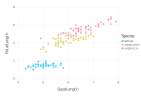

In [7]:
plot(iris, x=:SepalLength, y=:PetalLength, color=:Species)

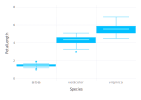

In [8]:
plot(iris, x=:Species, y=:PetalLength, Geom.boxplot)

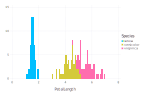

In [9]:
plot(iris, x=:PetalLength, color=:Species, Geom.histogram)

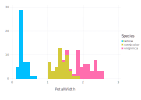

In [10]:
plot(iris, x=:PetalWidth, color=:Species, Geom.histogram)

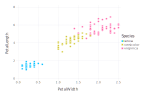

In [11]:
plot(iris, x=:PetalWidth, y=:PetalLength, color=:Species)

# Loading and saving our data

Julia comes with excellent facilities for reading and storing data out of the box. Given its
focus on data science and scientific computing, support for tabular-file formats (CSV, TSV)
is first class.

We can reference a section of a DataFrame by defining its bounds through the
corresponding columns and rows. For example, we can define a new DataFrame composed
only of the PetalLength and PetalWidth columns and the first three rows:

In [13]:
iris[1:10,[:PetalWidth, :PetalLength]]

,PetalWidth,PetalLength
,Float64,Float64
1,0.2,1.4
2,0.2,1.4
3,0.2,1.3
4,0.2,1.5
5,0.2,1.4
6,0.4,1.7
7,0.3,1.4
8,0.2,1.5
9,0.2,1.4


The generic indexing notation is dataframe[rows, cols], where rows can be a number,
a range, or an Array of boolean values where true indicates that the row should be
included:

In [14]:
iris[1:10,1:3]

,SepalLength,SepalWidth,PetalLength
,Float64,Float64,Float64
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4
6,5.4,3.9,1.7
7,4.6,3.4,1.4
8,5.0,3.4,1.5
9,4.4,2.9,1.4


In [18]:
iris[1:10,:PetalLength]

10-element Vector{Float64}:
 1.4
 1.4
 1.3
 1.5
 1.4
 1.7
 1.4
 1.5
 1.4
 1.5

The generic indexing notation is dataframe[rows, cols], where rows can be a number,
a range, or an Array of boolean values where true indicates that the row should be
included:

In [19]:
iris[trues(150), [:PetalLength, :PetalWidth]]

,PetalLength,PetalWidth
,Float64,Float64
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
6,1.7,0.4
7,1.4,0.3
8,1.5,0.2
9,1.4,0.2


Armed with this knowledge, let's take a sample from our original dataset. It will include
some 10% of the initial data and only the PetalLength, PetalWidth, and Species
columns:

In [49]:
test_data = iris[rand(150) .<= 0.1, [:PetalLength, :PetalWidth, :Species]]

,PetalLength,PetalWidth,Species
,Float64,Float64,Cat…
1,1.2,0.2,setosa
2,1.4,0.2,setosa
3,1.4,0.2,setosa
4,4.5,1.5,versicolor
5,4.6,1.3,versicolor
6,3.5,1.0,versicolor
7,3.9,1.1,versicolor
8,5.0,1.7,versicolor
9,3.7,1.0,versicolor


# Saving and loading using tabular file formats

We can easily save this data to a file in a tabular file format (one of CSV, TSV, and others)
using the CSV package. We'll have to add it first and then call the write method:

In [50]:
using CSV

In [59]:
CSV.write("SampleData.csv",test_data)

"SampleData.csv"

In [60]:
;ls

SampleData.csv
SampleData.CSV
Untitled.ipynb


And, just as easily, we can read back the data from tabular file formats, with the
corresponding CSV.read function:

In [62]:
td = CSV.read("SampleData.csv",DataFrame)

,PetalLength,PetalWidth,Species
,Float64,Float64,String15
1,1.2,0.2,setosa
2,1.4,0.2,setosa
3,1.4,0.2,setosa
4,4.5,1.5,versicolor
5,4.6,1.3,versicolor
6,3.5,1.0,versicolor
7,3.9,1.1,versicolor
8,5.0,1.7,versicolor
9,3.7,1.0,versicolor


# Working with Feather files

Feather is a binary file format that was specially designed for storing data frames. It is fast,
lightweight, and language-agnostic. The project was initially started in order to make it
possible to exchange data frames between R and Python. Soon, other languages added
support for it, including Julia.

Support for Feather files does not come out of the box, but is made available through the
homonymous package. Let's go ahead and add it and then bring it into scope:

In [64]:
using Feather

In [66]:
Feather.write("sample.feather", test_data)

"sample.feather"

In [67]:
td = Feather.read("sample.feather")

,PetalLength,PetalWidth,Species
,Float64,Float64,String
1,1.2,0.2,setosa
2,1.4,0.2,setosa
3,1.4,0.2,setosa
4,4.5,1.5,versicolor
5,4.6,1.3,versicolor
6,3.5,1.0,versicolor
7,3.9,1.1,versicolor
8,5.0,1.7,versicolor
9,3.7,1.0,versicolor


In order to provide compatibility with other languages, the Feather format
imposes some restrictions on the data types of the columns. You can read
more about Feather in the package's official documentation at https:/​/
juliadata.​github.​io/​Feather.​jl/​latest/​index.​html.

# Saving and loading with MongoDB